<a href="https://colab.research.google.com/github/klaudiajsk/machine-learning-algorithms/blob/main/MNIST_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Install:

> necessary libraries

> MNIST dataset

> Sequential model

> Dense and Dropout layers

> to_categorical function










In [85]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical

Split MNIST to train and test sets

In [86]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [87]:
x_train.shape

(60000, 28, 28)

In [88]:
x_test.shape


(10000, 28, 28)

In [89]:
y_train.shape


(60000,)

In [90]:
y_test.shape

(10000,)

Visualization of the one of the set's elements

3


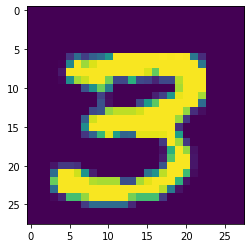

In [91]:
%matplotlib inline
print(y_train[111])
plt.imshow(x_train[111])
plt.show()

Vectorization and normalization

In [92]:
x_train = x_train.reshape((-1, 28*28))
x_test = x_test.reshape((-1, 784))

In [93]:
x_train = x_train / 255
x_test = x_test / 255

In [94]:
print("Min:", x_train.min())
print("Max: ", x_train.max())

Min: 0.0
Max:  1.0


Build a model

In [95]:
model = Sequential([
   Dense(512, activation='relu', input_shape=(784,)),
   Dense(128, activation='tanh'),
   Dropout(rate=0.05),
   Dense(64, activation='relu'),
   Dense(10, activation='softmax')
])

Compile

In [96]:
model.compile(
   optimizer='rmsprop',
   loss='categorical_crossentropy',
   metrics=['accuracy']
)

Trainig and evaluation

In [97]:
model.fit(
   x=x_train,
   y=to_categorical(y_train),
   epochs=10,
   batch_size=64,
   shuffle=True
)

Epoch 1/10
938/938 [==============================] - 7s 7ms/step - loss: 0.3612 - accuracy: 0.8883
Epoch 2/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0864 - accuracy: 0.9743
Epoch 3/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0575 - accuracy: 0.9821
Epoch 4/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0417 - accuracy: 0.9877
Epoch 5/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0334 - accuracy: 0.9895
Epoch 6/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0255 - accuracy: 0.9924
Epoch 7/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0210 - accuracy: 0.9934
Epoch 8/10
938/938 [==============================] - 6s 7ms/step - loss: 0.0186 - accuracy: 0.9938
Epoch 9/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0134 - accuracy: 0.9959
Epoch 10/10
938/938 [==============================] - 7s 7ms/step - loss: 0.0109 - accuracy: 0.9967

In [98]:
eval = model.evaluate(x_test, to_categorical(y_test))
eval

313/313 [==============================] - 1s 2ms/step - loss: 0.0899 - accuracy: 0.9828


[0.08991184085607529, 0.9828000068664551]

In [99]:
predictions = model.predict(x_test)

Accuracy

In [100]:
np.mean(np.argmax(predictions, axis=1) == y_test)

0.9828

In [101]:
wrong_predictions = np.argmax(predictions, axis=1) == y_test

Number of wrong predictions

In [102]:
np.size(wrong_predictions) - np.count_nonzero(wrong_predictions)

172